In [2]:
import h5py
import os
from mimicplay.scripts.aloha_process.simarUtils import nds


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy


In [3]:
hand_file = "/coc/flash7/datasets/egoplay/hand_data_robo_cam_jun3/hand_data_robo_cam_jun3Mimicplay.hdf5"
nds(h5py.File(hand_file))

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1330, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1330, 3)
			ee_pose_full_unnorm: (1330, 7)
			front_img_1: (1330, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions', 'label', 'obs']>
		actions: (1360, 30)
		label: (1,)
		obs: dict with keys:  <KeysViewHDF5 ['Gripper_position', 'ee_pose', 'ee_pose_full_unnorm', 'front_img_1', 'front_img_2', 'wrist_cam_1']>
			Gripper_position: ()
			ee_pose: (1360, 3)
			ee_pose_full_unnorm: (1360, 7)
			front_img_1: (1360, 480, 640, 3)
			front_img_2: (1, 1920, 1080, 3)
			wrist_cam_1: (1, 640, 480, 3)
	demo_2: dict with keys:  

In [6]:
aria_file = "/coc/flash7/datasets/egoplay/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_yellow_table_aria_final_ACT.hdf5"
nds(h5py.File(aria_file))

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 

In [7]:
def vis_histograms(file_path):
    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Initialize a list to store ee_pose data
        ee_pose_data = []

        # Iterate over all demos
        for demo_key in f['data'].keys():
            demo = f['data'][demo_key]
            ee_pose = demo['obs']['ee_pose'][:]
            ee_pose_data.append(ee_pose)

        # Concatenate all ee_pose data into a single numpy array
        ee_pose_data = np.concatenate(ee_pose_data, axis=0)
        print(ee_pose_data.shape)
        print(np.mean(ee_pose_data, axis=0))

    # Plot histograms for x, y, and z coordinates
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Set the bins range to be centered around zero
    bins_range = (-1, 1)

    axs[0].hist(ee_pose_data[:, 0], bins=50, range=bins_range, color='blue', alpha=0.7)
    axs[0].set_title('Histogram of x coordinate (ee_pose)')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('Frequency')
    axs[0].set_xlim(bins_range)

    axs[1].hist(ee_pose_data[:, 1], bins=50, range=bins_range, color='green', alpha=0.7)
    axs[1].set_title('Histogram of y coordinate (ee_pose)')
    axs[1].set_xlabel('y')
    axs[1].set_ylabel('Frequency')
    axs[1].set_xlim(bins_range)

    axs[2].hist(ee_pose_data[:, 2], bins=50, range=bins_range, color='red', alpha=0.7)
    axs[2].set_title('Histogram of z coordinate (ee_pose)')
    axs[2].set_xlabel('z')
    axs[2].set_ylabel('Frequency')
    axs[2].set_xlim(bins_range)

    plt.tight_layout()
    plt.show()


(55457, 3)
[0.10649366 0.22743606 0.39423181]


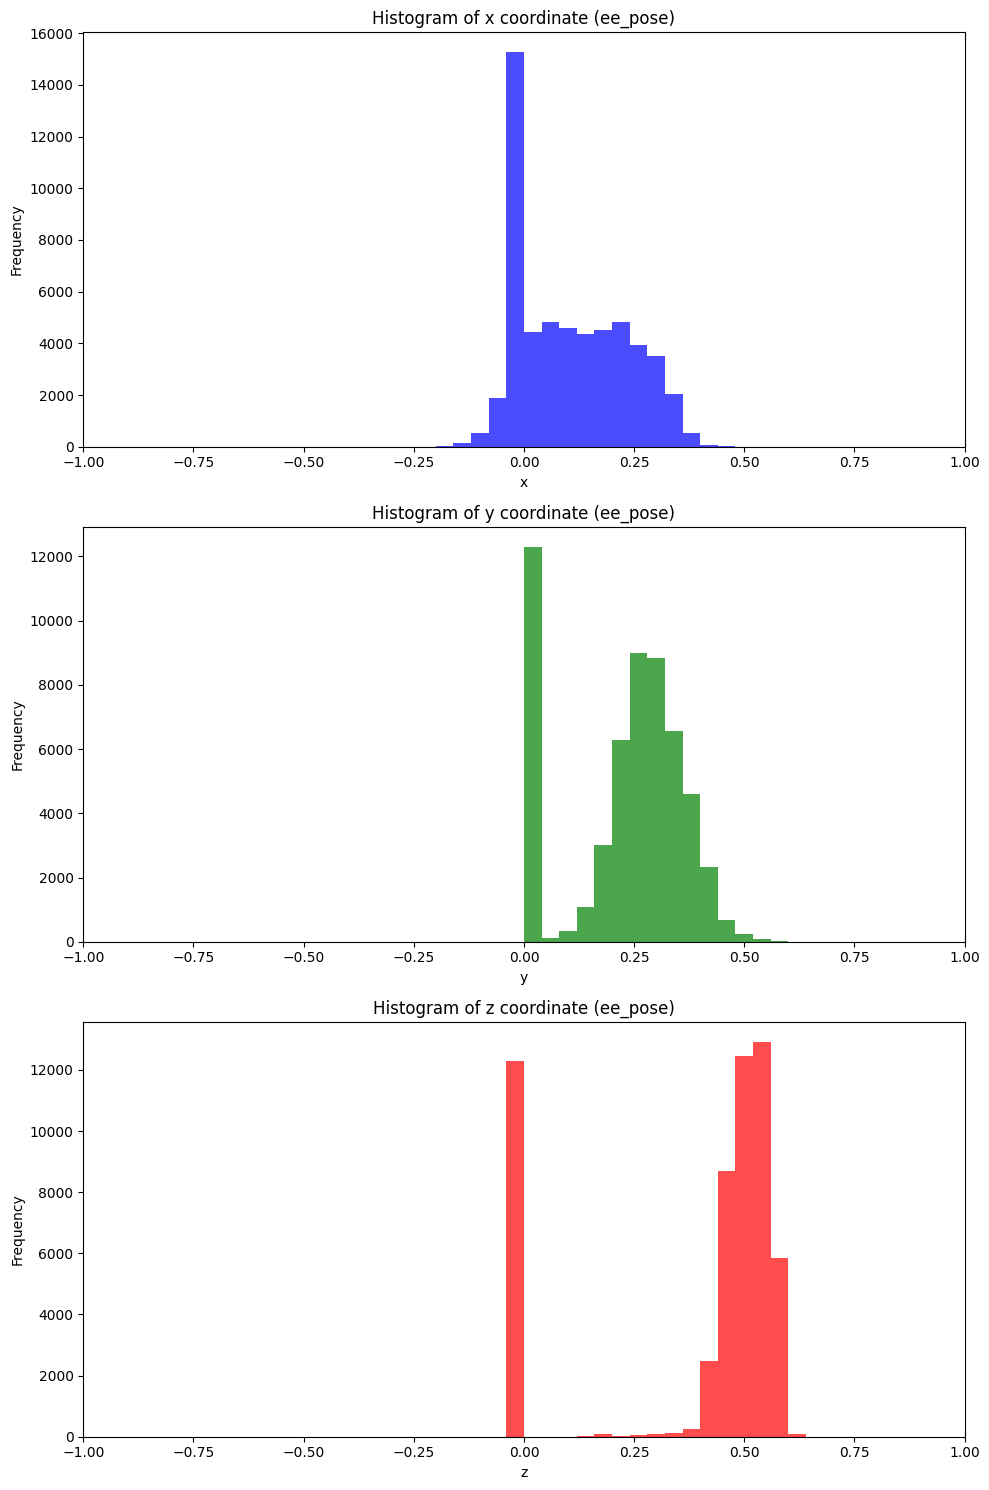

In [8]:
vis_histograms(aria_file)
[.1, .27, .5]
[.05, .2, .37]


add 
[0, .07, .23]
then after subtract it

(3959, 3)
[0.07579874 0.16893981 0.38710509]


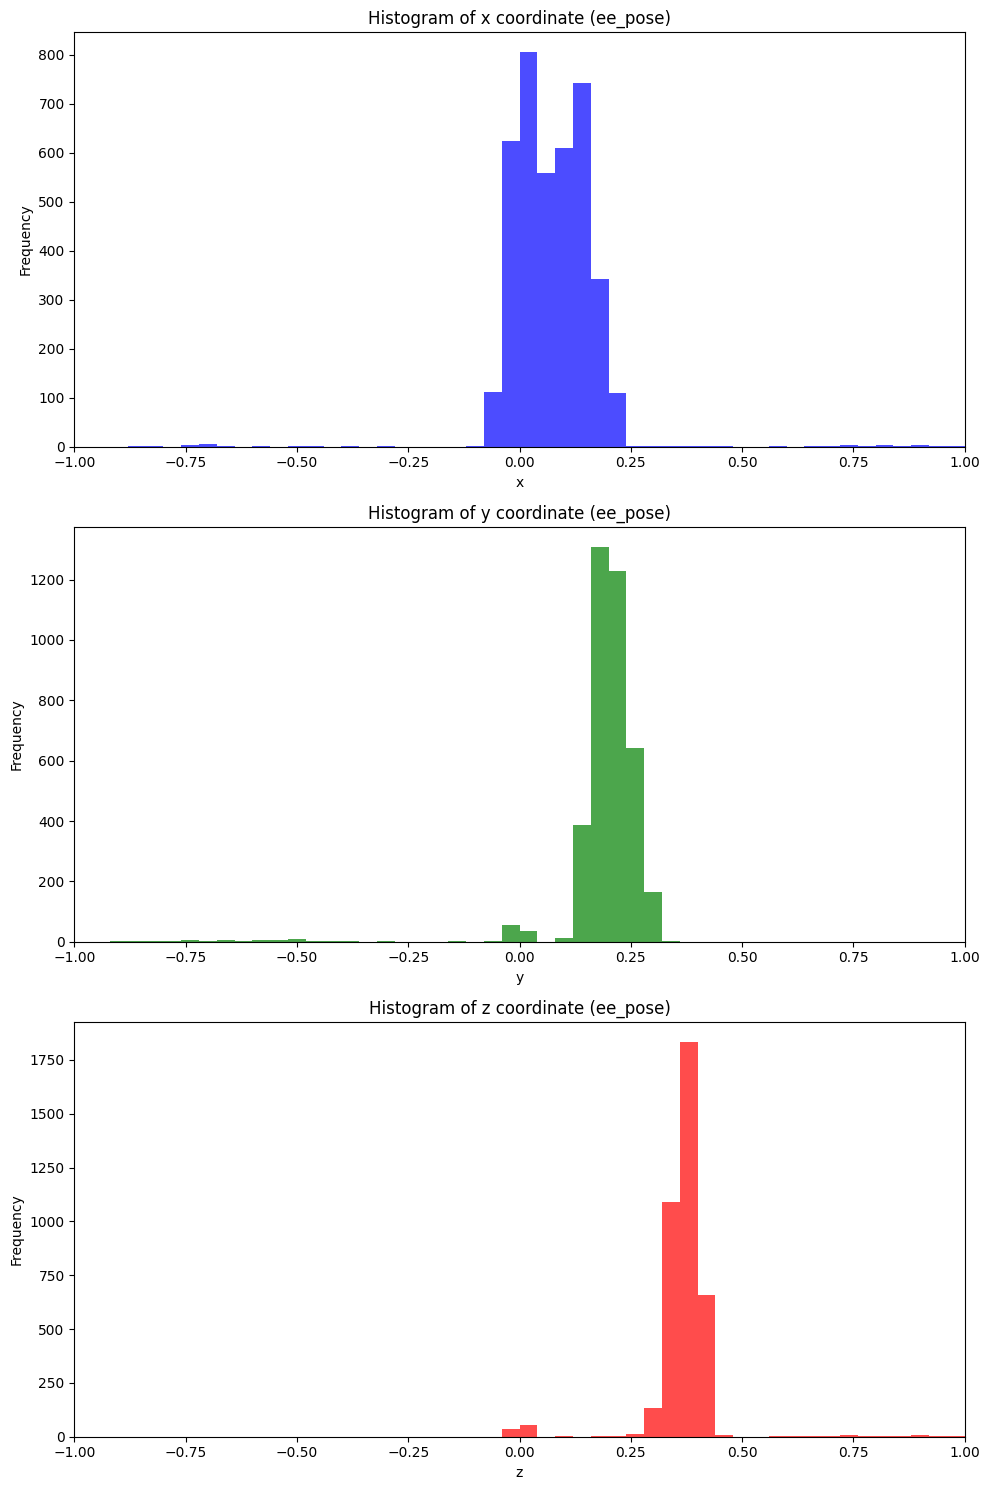

In [9]:
vis_histograms(hand_file)

(258500, 3)
[0.12987563 0.25202585 0.60604582]


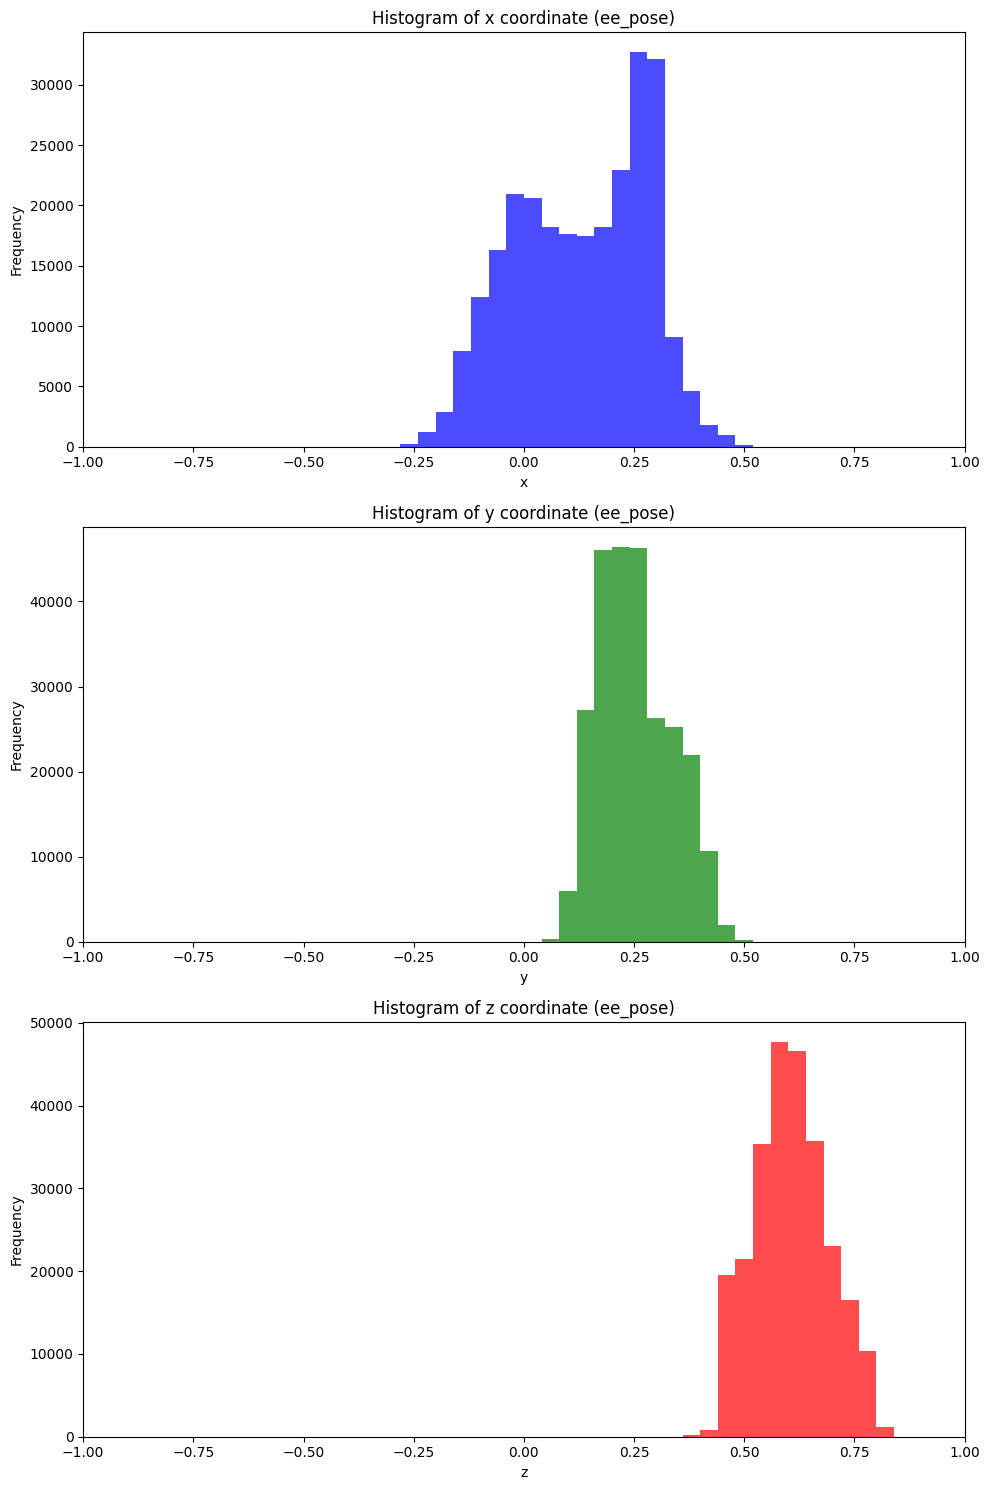

In [10]:
vis_histograms("/coc/flash7/datasets/egoplay/oboov2_robot_apr16/oboov2_robot_apr16Mimicplay.hdf5")

In [25]:
def load_ee_pose_data(file_path):
    with h5py.File(file_path, 'r') as f:
        ee_pose_data = []
        for demo_key in f['data'].keys():
            demo = f['data'][demo_key]
            ee_pose = demo['obs']['ee_pose'][:]
            ee_pose_data.append(ee_pose)
        return np.concatenate(ee_pose_data, axis=0)

def compute_kl_divergence(data1, data2, bins=50):
    hist1, bin_edges = np.histogram(data1, bins=bins, density=True)
    hist2, _ = np.histogram(data2, bins=bin_edges, density=True)
    
    # Add a small constant to avoid division by zero
    hist1 = hist1 + 1e-10
    hist2 = hist2 + 1e-10
    
    kl_divergence = entropy(hist1, hist2)
    return kl_divergence

In [26]:
def kl_div(file_path_1, file_path_2):

    ee_pose_data_1 = load_ee_pose_data(file_path_1)
    ee_pose_data_2 = load_ee_pose_data(file_path_2)

    # Extract x, y, z coordinates
    x_data_1 = ee_pose_data_1[:, 0]
    x_data_2 = ee_pose_data_2[:, 0]
    y_data_1 = ee_pose_data_1[:, 1]
    y_data_2 = ee_pose_data_2[:, 1]
    z_data_1 = ee_pose_data_1[:, 2]
    z_data_2 = ee_pose_data_2[:, 2]

    # Compute KL divergence for x, y, and z histograms
    kl_div_x = compute_kl_divergence(x_data_1, x_data_2)
    kl_div_y = compute_kl_divergence(y_data_1, y_data_2)
    kl_div_z = compute_kl_divergence(z_data_1, z_data_2)

    # Print results
    print(f"KL Divergence for x coordinate: {kl_div_x}")
    print(f"KL Divergence for y coordinate: {kl_div_y}")
    print(f"KL Divergence for z coordinate: {kl_div_z}")


In [29]:
kl_div(aria_file, hand_file)

KL Divergence for x coordinate: 4.2211706613341455
KL Divergence for y coordinate: 10.197820189403734
KL Divergence for z coordinate: 16.16042993791439


In [20]:
mean_diff = [0.14172136 - 0.09404152, 0.20823409 - 0.08462106, 0.43762491 - 0.26814098]
print(mean_diff)

[0.04767983999999999, 0.12361303000000001, 0.16948393]
